# Task 2 - Model Building and Training

In [8]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
from logger import SetupLogger
# Assuming this class is defined in scripts/
from load_data import LoadData  

logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()

In [9]:
# Create instances
load_fraud = LoadData('../data/processed_fraud_data.csv', logger=logger)
load_credit = LoadData('../data/creditcard.csv', logger=logger)
# Load the datasets
fraud_data = load_fraud.load_dataset().set_index('user_id')
credit_data = load_credit.load_dataset()

In [10]:
# Explore the few rows
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
fraud_data.head()

,purchase_value,age,class,purchase_delay,hour_of_day,day_of_week,user_transaction_frequency,device_transaction_frequency,user_transaction_velocity,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
user_id,,,,,,,,,,,,,,,,
22058,-0.160204,0.679914,0,-0.136057,-1.377455,0.991020,0.0,-0.261514,-0.230128,0.0,1.0,0.0,0.0,0.0,0.0,1.0
333320,-1.142592,2.304476,0,-1.571877,-1.522122,-1.501259,0.0,-0.261514,-0.229874,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1359,-1.197169,2.304476,1,-1.577617,0.937208,-0.005891,0.0,3.941861,4.345476,0.0,1.0,0.0,0.0,1.0,0.0,1.0
150084,0.385567,0.911994,0,-1.420213,0.213876,-1.501259,0.0,-0.261514,-0.230120,0.0,1.0,0.0,0.0,0.0,1.0,1.0
221365,0.112681,1.376155,0,-0.182509,0.937208,-0.504347,0.0,-0.261514,-0.230128,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [12]:
# Understand the shapes
credit_data.shape, fraud_data.shape

((284807, 31), (151112, 16))

In [13]:
# Check any missing values
print(credit_data.isnull().sum())
print(fraud_data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
purchase_value                  0
age                             0
class                           0
purchase_delay                  0
hour_of_day                     0
day_of_week                     0
user_transaction_frequency      0
device_transaction_frequency    0
user_transaction_velocity       0
source_Direct                   0
source_SEO                      0
browser_FireFox                 0
browser_IE                      0
browser_Opera                   0
browser_Safari                  0
sex_M                           0
dtype: int64


In [14]:
from data_preparation import DataPreparation
# Assuming df_creditcard is the DataFrame for the credit card dataset
_creditcard = DataPreparation(credit_data, target_column='Class')
_creditcard.train_test_split(test_size=0.2, random_state=42)

# Retrieving the train and test sets
X_train_cc, X_test_cc, y_train_cc, y_test_cc = _creditcard.get_train_test_data()

Data split into training and testing sets successfully.


In [15]:
# Assuming df_fraud is the DataFrame for the fraud dataset
_fraud = DataPreparation(fraud_data, target_column='class')
_fraud.train_test_split(test_size=0.2, random_state=42)

# Retrieving the train and test sets
X_train_fd, X_test_fd, y_train_fd, y_test_fd = _fraud.get_train_test_data()

Data split into training and testing sets successfully.


Model Selection
* Import ModelPipeline class from model_pipeline
* Train multiple models
* hyperparameter tune
* evaluate the model
* compare the model

In [16]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1' # Disable CUDA

# Import the class
from model_pipeline import ModelPipeline

2025-02-17 02:08:07.626679: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-17 02:08:07.640684: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-17 02:08:07.766679: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-17 02:08:07.887372: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739747288.008541   59944 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739747288.04

Train and Evaluate the models on the e-commerce fruad dataset

In [17]:
# Create instance of the pipeline
model_pipeline = ModelPipeline(X_train_fd, X_test_fd, y_train_fd, y_test_fd)

# add models
# model_pipeline.add_models()
# Train and evaluate, logging with MLflow
best_model, best_model_name = model_pipeline.train_and_evaluate()
# Save the best model
model_pipeline.save_best_models(best_model, best_model_name, 'fraud')

2025-02-17 02:08:21.621631: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Tuning hyperparameters for Random Forest...
Random Forest best parameters: {'classifier__max_depth': 5, 'classifier__n_estimators': 100}
Tuning hyperparameters for Gradient Boosting...
Gradient Boosting best parameters: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 100}
Random Forest took 13.91 seconds to train


2025/02/17 02:11:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'random_forest' already exists. Creating a new version of this model...
Created version '4' of model 'random_forest'.


Random Forest model trained and logged with MLflow
Gradient Boosting took 53.56 seconds to train


2025/02/17 02:12:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'gradient_boosting' already exists. Creating a new version of this model...
Created version '4' of model 'gradient_boosting'.


Gradient Boosting model trained and logged with MLflow
945/945 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step


2025/02/17 02:18:00 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


LSTM took 303.00 seconds to train


2025/02/17 02:18:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'lstm' already exists. Creating a new version of this model...
Created version '4' of model 'lstm'.


LSTM model trained and logged with MLflow
945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


2025/02/17 02:20:27 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


CNN took 130.68 seconds to train


2025/02/17 02:20:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


CNN model trained and logged with MLflow
Gradient Boosting best model saved.


Registered model 'cnn' already exists. Creating a new version of this model...
Created version '4' of model 'cnn'.


In [18]:
# Get the results 
results_fraud, y_probs_fraud = model_pipeline.get_results()

In [19]:
pd.DataFrame(results_fraud).T

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Random Forest,0.956424,1.0,0.537895,0.699521,0.846812
Gradient Boosting,0.956424,1.0,0.537895,0.699521,0.849551
LSTM,0.956424,1.0,0.537895,0.699521,0.846078
CNN,0.956424,1.0,0.537895,0.699521,0.847545


Train and Evaluate the models on the creditcard dataset

In [20]:
# Create instance of the pipeline
model_pipeline = ModelPipeline(X_train_cc, X_test_cc, y_train_cc, y_test_cc)

# add models
model_pipeline.add_models()
# Train and evaluate, logging with MLflow
best_model, best_model_name = model_pipeline.train_and_evaluate()
# Save the best model
model_pipeline.save_best_models(best_model, best_model_name, 'creditcard')

Tuning hyperparameters for Random Forest...
Random Forest best parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Tuning hyperparameters for Gradient Boosting...
Gradient Boosting best parameters: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 100}
Random Forest took 286.49 seconds to train


2025/02/17 03:25:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'random_forest' already exists. Creating a new version of this model...
Created version '5' of model 'random_forest'.


Random Forest model trained and logged with MLflow
Gradient Boosting took 680.86 seconds to train


2025/02/17 03:37:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'gradient_boosting' already exists. Creating a new version of this model...
Created version '5' of model 'gradient_boosting'.


Gradient Boosting model trained and logged with MLflow
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step


2025/02/17 03:47:04 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


LSTM took 583.94 seconds to train


2025/02/17 03:47:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'lstm' already exists. Creating a new version of this model...
Created version '5' of model 'lstm'.


LSTM model trained and logged with MLflow
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2025/02/17 03:49:42 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


CNN took 148.70 seconds to train


2025/02/17 03:49:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


CNN model trained and logged with MLflow
Random Forest best model saved.


Registered model 'cnn' already exists. Creating a new version of this model...
Created version '5' of model 'cnn'.


In [21]:
# Get the results 
results_creditcard, y_probs_credicard = model_pipeline.get_results()

In [22]:
pd.DataFrame(results_creditcard).T

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Random Forest,0.999544,0.961538,0.765306,0.852273,0.982408
Gradient Boosting,0.999403,0.984848,0.663265,0.792683,0.928369
LSTM,0.999350,0.814433,0.806122,0.810256,0.976520
CNN,0.999175,0.849315,0.632653,0.725146,0.931189


Note: Model training and evaluation have been completed, with all processes tracked using MLflow. Please refer to the document for screenshots showcasing the tracked models across different versions.

## Task 3 - Model Explainability

Model explainability is crucial for understanding, trust, and debugging in machine learning models. I will use SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations) to interpret the models I built for fraud detection.



Using SHAP and LIME for Explainability of the model trained with E-commerce fraud detection

Generating SHAP explanations...


 99%|===================| 29828/30223 [00:42<00:00]        

Type of SHAP values: <class 'numpy.ndarray'>
Shape of SHAP values: (30223, 15)


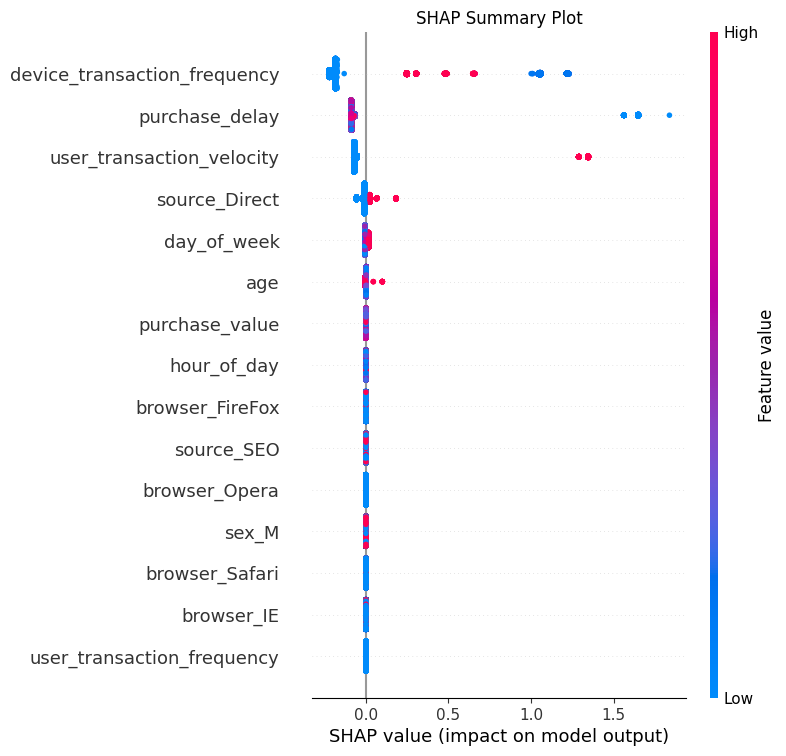

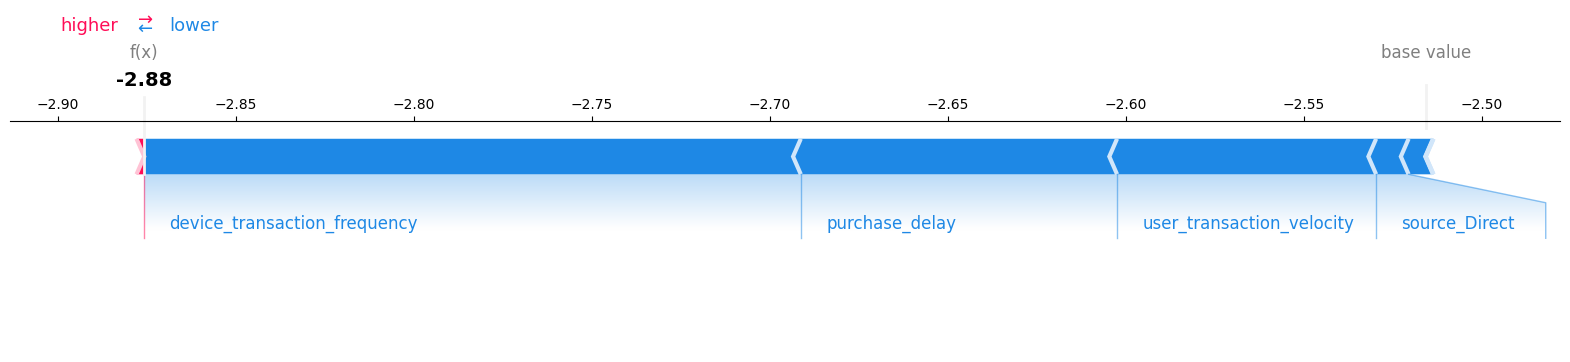

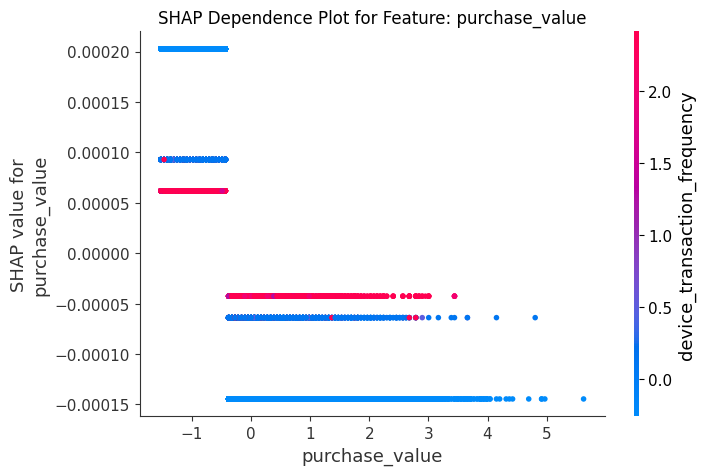

Generating LIME explanations...
Instance shape for LIME: (15,)


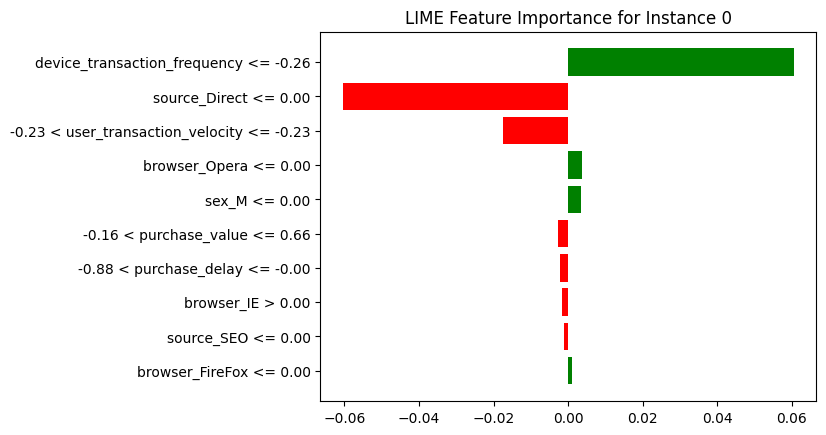

In [25]:
# # Import neccessary modules
from model_explainer import ModelExplainer

# Create instance of the class
fraud_explainer = ModelExplainer('../app/gradient_boosting_fraud_best_model.pkl', X_test_fd)

 # Explains the first instance in the dataset
fraud_explainer.explain_model(instance_idx=0) 